In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt

In [3]:
price1999 = pd.read_csv('Data/resale-flat-prices-based-on-approval-date-1990-1999.csv')
price2012 = pd.read_csv('Data/resale-flat-prices-based-on-approval-date-2000-feb-2012.csv')
price2014 = pd.read_csv('Data/resale-flat-prices-based-on-registration-date-from-mar-2012-to-dec-2014.csv')
price2016 = pd.read_csv('Data/resale-flat-prices-based-on-registration-date-from-jan-2015-to-dec-2016.csv')
price2017 = pd.read_csv('Data/resale-flat-prices-based-on-registration-date-from-jan-2017-onwards.csv')
cpi = pd.read_csv('Data/CPI.csv')

In [4]:
price1999.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200


In [5]:
price2012.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,2000-01,ANG MO KIO,3 ROOM,170,ANG MO KIO AVE 4,07 TO 09,69.0,Improved,1986,147000.0
1,2000-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,04 TO 06,61.0,Improved,1986,144000.0
2,2000-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1976,159000.0
3,2000-01,ANG MO KIO,3 ROOM,215,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1976,167000.0
4,2000-01,ANG MO KIO,3 ROOM,218,ANG MO KIO AVE 1,07 TO 09,67.0,New Generation,1976,163000.0


In [6]:
price2014.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,2012-03,ANG MO KIO,2 ROOM,172,ANG MO KIO AVE 4,06 TO 10,45.0,Improved,1986,250000.0
1,2012-03,ANG MO KIO,2 ROOM,510,ANG MO KIO AVE 8,01 TO 05,44.0,Improved,1980,265000.0
2,2012-03,ANG MO KIO,3 ROOM,610,ANG MO KIO AVE 4,06 TO 10,68.0,New Generation,1980,315000.0
3,2012-03,ANG MO KIO,3 ROOM,474,ANG MO KIO AVE 10,01 TO 05,67.0,New Generation,1984,320000.0
4,2012-03,ANG MO KIO,3 ROOM,604,ANG MO KIO AVE 5,06 TO 10,67.0,New Generation,1980,321000.0


In [7]:
price2016.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,70,255000.0
1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,65,275000.0
2,2015-01,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,69.0,New Generation,1980,64,285000.0
3,2015-01,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1979,63,290000.0
4,2015-01,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,07 TO 09,68.0,New Generation,1980,64,290000.0


In [8]:
# Merge dfs
prices = pd.concat([price1999, price2012, price2014], sort=False)
prices = pd.concat([prices, price2016, price2017], axis=0, ignore_index=True, sort=False)

prices['month'] = pd.to_datetime(prices['month']) # to datetime

prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 826581 entries, 0 to 826580
Data columns (total 11 columns):
month                  826581 non-null datetime64[ns]
town                   826581 non-null object
flat_type              826581 non-null object
block                  826581 non-null object
street_name            826581 non-null object
storey_range           826581 non-null object
floor_area_sqm         826581 non-null float64
flat_model             826581 non-null object
lease_commence_date    826581 non-null int64
resale_price           826581 non-null float64
remaining_lease        117527 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(7)
memory usage: 69.4+ MB


In [9]:
prices.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN
1,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN
2,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN
3,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN
4,1990-01-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,NaN


# LOOK AT DUPLICATES!!!

## Clean

In [10]:
# Clean flat type
prices['flat_type'] = prices['flat_type'].str.replace('MULTI-GENERATION', 'MULTI GENERATION')
prices['flat_type'].unique()




array(['1 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', '2 ROOM', 'EXECUTIVE',
       'MULTI GENERATION'], dtype=object)

In [11]:
# Rename flat model duplicates
replace_values = {'NEW GENERATION':'New Generation', 'SIMPLIFIED':'Simplified', 'STANDARD':'Standard', 'MODEL A-MAISONETTE':'Maisonette', 'MULTI GENERATION':'Multi Generation', 'IMPROVED-MAISONETTE':'Executive Maisonette', 'Improved-Maisonette':'Executive Maisonette', 'Premium Maisonette':'Executive Maisonette', '2-ROOM':'2-room', 'MODEL A':'Model A', 'MAISONETTE':'Maisonette', 'Model A-Maisonette':'Maisonette', 'IMPROVED':'Improved', 'TERRACE':'Terrace', 'PREMIUM APARTMENT':'Premium Apartment', 'Premium Apartment Loft':'Premium Apartment', 'APARTMENT':'Apartment', 'Type S1':'Type S1S2', 'Type S2':'Type S1S2'}

prices = prices.replace({'flat_model': replace_values})

prices['flat_model'].value_counts()



Model A                 228389
Improved                217356
New Generation          177570
Simplified               53960
Standard                 39854
Premium Apartment        35066
Apartment                32004
Maisonette               28798
Model A2                  9109
DBSS                      1609
Adjoined flat             1085
Terrace                    642
Multi Generation           502
Type S1S2                  401
Executive Maisonette       196
2-room                      40
Name: flat_model, dtype: int64

**Types of Flat Models:**

[**Standard:**](https://www.teoalida.com/singapore/hdbfloorplans/) (1/2/3/4/5-room). 1960s HDB. Had WC and shower in same room. 5-room Standard were introduced in 1974. <br>
[**Improved:**](https://www.teoalida.com/singapore/hdbfloorplans/) (1/2/3/4/5-room). Introduced in 1966, the 3/4-room having separate WC and shower, they also featured void decks. 5-room Improved were introduced in 1974. <br>
[**New Generation:**](https://www.teoalida.com/singapore/hdbfloorplans/) Started first in 1975, New Generation flats can be 3-Room (67 / 82 sqm) or 4-Room (92 sqm), featuring en-suite toilet for master bedroom, with pedestal type Water Closet, plus store room. <br>
[**Model A:**](https://www.teoalida.com/singapore/hdbfloorplans/) Introduced in 1981: 3-Room (75 sqm), 4-Room (105 sqm), 5-Room (135 sqm), 5-Room Maisonette (139 sqm) <br>
[**Model A2:**](https://www.teoalida.com/singapore/hdbfloorplans/) Smaller units of Model A. e.g., 4-Room Model A2 (90 sqm) <br>
[**Simplified:**](https://www.teoalida.com/singapore/hdbfloorplans/) Introduced in 1984: 3-Room (64 sqm), 4-Room (84 sqm) <br>
[**Multi Generation:**](https://blog.carousell.com/property/hdb-flat-types-singapore/) 3Gen flats designed to meet the needs of multi-generation families. <br>
[**Maisonette:**](https://sg.finance.yahoo.com/news/different-types-hdb-houses-call-020000642.html#:~:text=Model%20A%20Maisonettes%20are%20HDB,ft%20to%201%2C551%20sq%20ft.) AKA Model A Maisonette — 2 storeys HDB flat <br>
[**Premium Apartment:**](https://www.teoalida.com/singapore/hdbfloorplans/) Introduced somewhere during 1990s, featuring better quality finishes, you get them in ready-to-move condition, with flooring, kitchen cabinets, built-in wardrobes <br>
[**Executive Maisonette:**](https://sg.finance.yahoo.com/news/different-types-hdb-houses-call-020000642.html#:~:text=Model%20A%20Maisonettes%20are%20HDB,ft%20to%201%2C551%20sq%20ft.) More premium version of Model A Maisonettes. These units are no longer being built after being replaced by the Executive Condominium (EC) scheme in 1995 <br>
[**Executive Apartment:**](https://www.teoalida.com/singapore/hdbfloorplans/) Executive Apartment / Maisonette (146-150 sqm) were introduced in 1983 and replaced 5-Room Model A flats, in addition of the 3-bedroom and separate living/dining found in 5A flats, EA and EM feature an utility/maid room. 80% of Executive units were Maisonettes and 20% were Apartments. <br>
[**DBBS:**](https://www.propertyguru.com.sg/property-guides/dbss-singapore-17893) public apartments built under the HDB's short-lived Design, Build and Sell Scheme (DBSS) from 2005 to 2012. They are a unique (and premium) breed of HDB flats in Singapore, which are built by private developers. High Prices. Quite similiar to Executive Condominium except DBBS is like a premium HDB without facilities of private condos <br>
[**Adjoined Flat:**](https://blog.carousell.com/property/hdb-flat-types-singapore/) Large HDB flats which are combined from 2 HDB flats <br>
[**Terrace:**](https://blog.carousell.com/property/hdb-flat-types-singapore/) HDB terrace flats built before HDB, without realizing Singapore's land constraint. Discontinued <br>
[**Type S1S2:**](http://getforme.com/previous2004/previous290504_hdblaunchesthepinnancleatduxton.htm)  apartments at The Pinnacle@Duxton are classified as "S" or Special apartments in view of its historical significance and award-winning design. For application of HDB policies, S1 and S2 apartments will be treated as 4-room and 5-room flats respectively <br>
[**2-room:**](https://blog.carousell.com/property/hdb-flat-types-singapore/) Most likely refers to 2-room flexi where there is 1 bedroom and 1 common area <br>

In [12]:
prices['storey_range'].unique()

array(['10 TO 12', '04 TO 06', '07 TO 09', '01 TO 03', '13 TO 15',
       '19 TO 21', '16 TO 18', '25 TO 27', '22 TO 24', '28 TO 30',
       '31 TO 33', '40 TO 42', '37 TO 39', '34 TO 36', '06 TO 10',
       '01 TO 05', '11 TO 15', '16 TO 20', '21 TO 25', '26 TO 30',
       '36 TO 40', '31 TO 35', '46 TO 48', '43 TO 45', '49 TO 51'],
      dtype=object)

In [13]:
prices['town'].unique()

array(['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH',
       'BUKIT TIMAH', 'CENTRAL AREA', 'CHOA CHU KANG', 'CLEMENTI',
       'GEYLANG', 'HOUGANG', 'JURONG EAST', 'JURONG WEST',
       'KALLANG/WHAMPOA', 'MARINE PARADE', 'QUEENSTOWN', 'SENGKANG',
       'SERANGOON', 'TAMPINES', 'TOA PAYOH', 'WOODLANDS', 'YISHUN',
       'LIM CHU KANG', 'SEMBAWANG', 'BUKIT PANJANG', 'PASIR RIS',
       'PUNGGOL'], dtype=object)

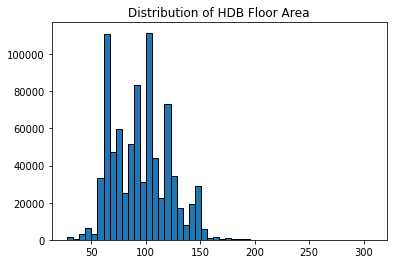

Terrace                 61
Maisonette              14
Executive Maisonette     7
Apartment                4
Adjoined flat            1
Name: flat_model, dtype: int64

In [14]:
plt.hist(prices['floor_area_sqm'], bins=50, edgecolor='black')
plt.title('Distribution of HDB Floor Area')
plt.show()
display(prices[prices['floor_area_sqm'] > 200]['flat_model'].value_counts())

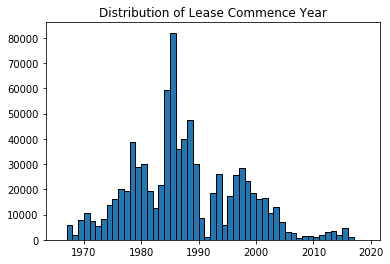

In [15]:
bins = prices['lease_commence_date'].max() - prices['lease_commence_date'].min()
plt.hist(prices['lease_commence_date'], bins=bins, edgecolor='black')
plt.title('Distribution of Lease Commence Year')
plt.show()

In [16]:
# Compute Resale Price Adjusted for Inflation Using Consumer Price Index for Housing & Utilities
# https://www.singstat.gov.sg/find-data/search-by-theme/economy/prices-and-price-indices/latest-data
cpi['month'] = pd.to_datetime(cpi['month'], format='%Y %b') # to datetime
prices = prices.merge(cpi, on='month', how='left') 
# https://people.duke.edu/~rnau/411infla.htm
prices['real_price'] = (prices['resale_price'] / prices['cpi']) * 100 

In [17]:
prices.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 826581 entries, 0 to 826580
Data columns (total 13 columns):
month                  826581 non-null datetime64[ns]
town                   826581 non-null object
flat_type              826581 non-null object
block                  826581 non-null object
street_name            826581 non-null object
storey_range           826581 non-null object
floor_area_sqm         826581 non-null float64
flat_model             826581 non-null object
lease_commence_date    826581 non-null int64
resale_price           826581 non-null float64
remaining_lease        117527 non-null object
cpi                    826581 non-null float64
real_price             826581 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(1), object(7)
memory usage: 88.3+ MB


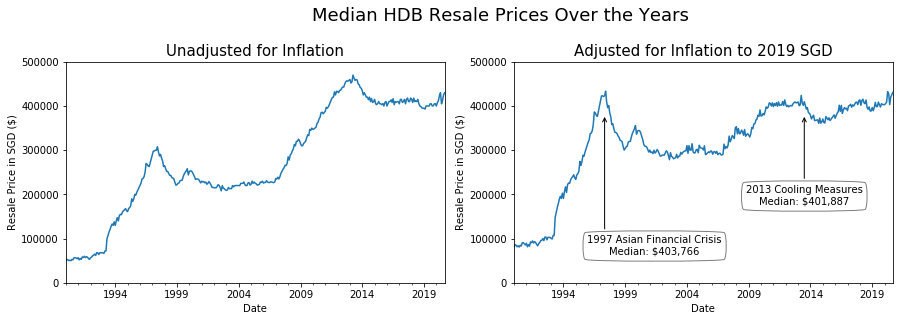

In [18]:
# Plot Median Resale Prices Over the Years

# Unadjusted
fig = plt.figure(figsize=(14,4.5))
fig.suptitle('Median HDB Resale Prices Over the Years', fontsize=18)
ax1 = fig.add_subplot(121)
prices.groupby('month')[['resale_price']].median().plot(ax=ax1, legend=None)
ax1.set_xlabel('Date'), ax1.set_ylabel('Resale Price in SGD ($)'), ax1.set_ylim(0, 500000), ax1.set_title('Unadjusted for Inflation', size=15)

# Adjusted
# https://jakevdp.github.io/PythonDataScienceHandbook/04.09-text-and-annotation.html
ax2 = fig.add_subplot(122)
prices.groupby('month')[['real_price']].median().plot(ax=ax2, legend=None)
ax2.set_xlabel('Date'), ax2.set_ylabel('Resale Price in SGD ($)'), ax2.set_ylim(0, 500000), ax2.set_title('Adjusted for Inflation to 2019 SGD',size=15)
ax2.annotate('1997 Asian Financial Crisis\nMedian: $403,766', xy=('1997-05-01',380000), xycoords='data', 
    bbox=dict(boxstyle="round4,pad=.5", fc="none", ec="gray"), xytext=(50,-140), textcoords='offset points', ha='center',
    arrowprops=dict(arrowstyle="->", connectionstyle="angle,angleA=0,angleB=90,rad=20"))
ax2.annotate('2013 Cooling Measures\nMedian: $401,887', xy=('2013-07-01',380000), xycoords='data', 
    bbox=dict(boxstyle="round4,pad=.5", fc="none", ec="gray"), xytext=(0,-90), textcoords='offset points', ha='center',
    arrowprops=dict(arrowstyle="->", connectionstyle="angle,angleA=0,angleB=90,rad=20"))  
plt.tight_layout(rect=[0, 0, 0.9, 0.9]) 
plt.show()
#prices.set_index('month').loc['1997']['real_price'].median()

Following the collapse of the thai Baht in July 1997, housing prices in Singapore continue to fall and only started gradually increasing again around 2004. In 2013, it experienced a decline due to 'Propery Market Cooling Measures', such as the Additional Buyer's Stamp Duty (ABSD), Loan-to-Value (LTV) Ratio, and Total Debt Servicing Ratio (TDSR). Refer [here](https://www.srx.com.sg/cooling-measures) for more information.

In [37]:
# Convert remaining_lease to number of years
def getYears(text):
    if isinstance(text, str):
        yearmonth = [int(s) for s in text.split() if s.isdigit()]
        if len(yearmonth) > 1: # if there's year and month
            years = yearmonth[0] + (yearmonth[1]/12)
        else: # if only year
            years = yearmonth[0]
        return years
    else: # if int
        return text

prices['remaining_lease'] = prices['remaining_lease'].apply(lambda x: getYears(x))



In [38]:
prices.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 826581 entries, 0 to 826580
Data columns (total 13 columns):
month                  826581 non-null datetime64[ns]
town                   826581 non-null object
flat_type              826581 non-null object
block                  826581 non-null object
street_name            826581 non-null object
storey_range           826581 non-null object
floor_area_sqm         826581 non-null float64
flat_model             826581 non-null object
lease_commence_date    826581 non-null int64
resale_price           826581 non-null float64
remaining_lease        117527 non-null float64
cpi                    826581 non-null float64
real_price             826581 non-null float64
dtypes: datetime64[ns](1), float64(5), int64(1), object(6)
memory usage: 88.3+ MB


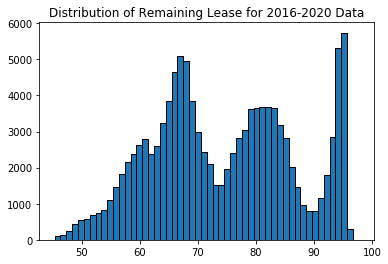

In [40]:
bins = prices['remaining_lease'].max() - prices['remaining_lease'].min()
plt.hist(prices['remaining_lease'], bins=int(bins), edgecolor='black')
plt.title('Distribution of Remaining Lease for 2016-2020 Data')
plt.show()

In [57]:
prices.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,cpi,real_price
0,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,Improved,1977,9000.0,NaN,60.894,14779.781259
1,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,Improved,1977,6000.0,NaN,60.894,9853.187506
2,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,Improved,1977,8000.0,NaN,60.894,13137.583342
3,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,Improved,1977,6000.0,NaN,60.894,9853.187506
4,1990-01-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,New Generation,1976,47200.0,NaN,60.894,77511.741715


## Exploratory Data Analysis

In [42]:
group_df

,flat_type,No_of_Transactions
3,4 ROOM,309314
2,3 ROOM,272580
4,5 ROOM,170408
5,EXECUTIVE,62641
1,2 ROOM,9863
0,1 ROOM,1273
6,MULTI GENERATION,502


In [45]:
import plotly.express as px
import shap
shap.initjs()

group_df = prices.groupby('flat_type')['month'].agg('count').reset_index()
group_df = group_df.rename(columns = {'month':'No_of_Transactions'})
group_df = group_df.sort_values(by = 'No_of_Transactions', ascending = False)

# plot horizontal bar chart
fig = px.bar(group_df, y = 'flat_type', x = 'No_of_Transactions', title = 'Number of transactions for each flat type',
            orientation = 'h')

fig.update_layout(
    title="Number of transactions across flat type",
    xaxis_title="No. of Transactions",
    yaxis_title="Flat Type",
)

fig.show()